In [17]:
import sys

# Add the parent directory to sys.path
sys.path.append("/home/jovyan/video-storage/amit_files/")

# KPDetector

In [74]:
# kp_detector = KPDetector(block_expansion = 32,num_kp = 10,num_channels = 3, max_features = 1024,num_blocks = 5,temperature = 0.1,estimate_jacobian = True,scale_factor= 0.25,single_jacobian_map = True)

In [18]:
import os
path = os.listdir('/home/jovyan/video-storage/amit_files/Master_Thesis_Project/DUTS-TE/DUTS-TE-Image')
print(len(path))

5019


In [78]:
img_path = '/home/jovyan/video-storage/amit_files/MTP_01/DUTS-TE/DUTS-TE-Image/' + path[0]
img_path

'/home/jovyan/video-storage/amit_files/MTP_01/DUTS-TE/DUTS-TE-Image/ILSVRC2012_test_00040628.jpg'

(400, 300)

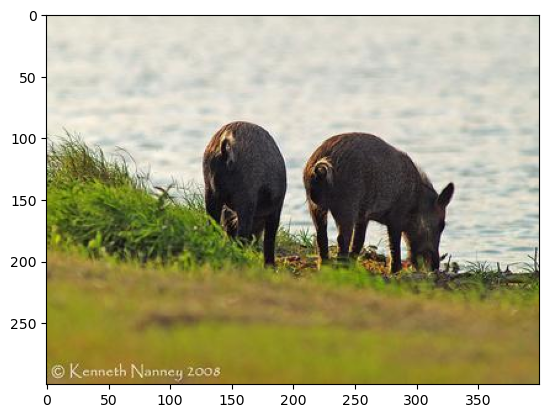

In [79]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = Image.open(img_path)
plt.imshow(img)

img.size

In [80]:
import torchvision.transforms as transforms
from PIL import Image

resize_transform = transforms.Resize((128, 128))

resized_image_pil = resize_transform(img)

# Optionally, convert it back to a tensor if required
to_tensor = transforms.ToTensor()
resized_image_tensor = to_tensor(resized_image_pil)

# Print the new size
print(resized_image_tensor.shape)


torch.Size([3, 128, 128])


In [83]:
resized_image_tensor.size()
resized_image_tensor = resized_image_tensor.unsqueeze(0)
resized_image_tensor.size()

torch.Size([1, 3, 128, 128])

In [87]:
output = model(resized_image_tensor)

In [88]:
output

{'value': tensor([[[-0.1962, -0.3199],
          [-0.2559, -0.4229],
          [ 0.3945,  0.4271],
          [-0.1906, -0.0480],
          [ 0.1324,  0.2314],
          [-0.7641, -0.3000],
          [-0.6121,  0.3468],
          [ 0.0336,  0.2678],
          [ 0.7297,  0.2226],
          [ 0.1199,  0.2253]]], grad_fn=<SumBackward1>),
 'jacobian': tensor([[[[1.0000, 0.0000],
           [0.0000, 1.0000]],
 
          [[1.0000, 0.0000],
           [0.0000, 1.0000]],
 
          [[1.0000, 0.0000],
           [0.0000, 1.0000]],
 
          [[1.0000, 0.0000],
           [0.0000, 1.0000]],
 
          [[1.0000, 0.0000],
           [0.0000, 1.0000]],
 
          [[1.0000, 0.0000],
           [0.0000, 1.0000]],
 
          [[1.0000, 0.0000],
           [0.0000, 1.0000]],
 
          [[1.0000, 0.0000],
           [0.0000, 1.0000]],
 
          [[1.0000, 0.0000],
           [0.0000, 1.0000]],
 
          [[1.0000, 0.0000],
           [0.0000, 1.0000]]]], grad_fn=<ViewBackward0>)}

# VAE TRIAL

In [7]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.PREDICTOR.utils import initialize_weights

__all__ = ['VDE']


In [8]:
def Layer(i, o, activation=None, p=0., bias=True):
    model = [nn.Linear(i, o, bias=bias)]
    if activation == 'SELU':
        model += [nn.SELU(inplace=True)]
    elif activation == 'RELU':
        model += [nn.ReLU(inplace=True)]
    elif activation == 'LeakyReLU':
        model += [nn.LeakyReLU(inplace=True)]
    elif activation == 'Sigmoid':
        model += [nn.Sigmoid()]
    elif activation == 'Tanh':
        model += [nn.Tanh()]
    elif activation == 'Swish':
        model += [Swish()]
    elif type(activation) is str:
        raise ValueError('{} activation not implemented.'.format(activation))

    if p > 0.:
        model += [nn.Dropout(p)]
    return nn.Sequential(*model)

In [9]:
x = Layer(12,32,activation = "RELU",p=0.5)
x

Sequential(
  (0): Linear(in_features=12, out_features=32, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
)

In [10]:
# Batch Size, input_size
inp = torch.randn(12,12)
y = x(inp)
y

tensor([[0.0000, 0.0000, 0.0000, 0.1590, 0.0000, 0.0000, 0.0000, 0.0000, 0.0336,
         0.1846, 0.6148, 0.9019, 1.5357, 1.0366, 0.0000, 0.0000, 0.6260, 0.0000,
         0.0000, 0.0000, 0.0000, 0.2476, 0.1886, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0088, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         1.2239, 0.0000, 0.0000, 0.4112, 0.0000, 0.0000, 0.0000, 1.1547, 0.6146,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3850, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.8712, 0.0000, 0.0000, 0.0000, 0.0000, 0.3296, 0.0000,
         0.0918, 0.0000, 0.6151, 0.0000, 0.0000, 0.0000, 0.0000, 0.3267, 0.7442,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2956, 1.2924,
         0.0000, 0.0000, 0.0000, 1.3801, 0.0000],
        [0.0000, 1.3318, 0.0000, 0.0000, 0.0000, 1.2097, 0.0000, 0.0000, 0.0000,
         0.6316, 0.0000, 0.0000, 0.7839,

In [11]:
# Return tensor multiply by sigmoid to each tensor element
class Swish(nn.Module):
    def __init__(self):
        super(Swish, self).__init__()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return x * self.sigmoid(x)

In [12]:
image = torch.randn(3,12)

In [13]:
y = Swish()(image)
y

tensor([[ 1.0553,  0.3741,  0.6541, -0.1396, -0.0987,  1.0105, -0.2784,  0.0420,
          0.2128,  0.3868,  0.2374, -0.2722],
        [-0.2690, -0.1306,  0.7028, -0.2707, -0.2057, -0.2743,  0.6295,  0.7747,
          0.1479,  0.4533,  0.0772, -0.0217],
        [ 0.5289, -0.2260,  0.1030, -0.2667, -0.2431, -0.2755, -0.2671, -0.2754,
          0.3440,  0.1947,  0.0189,  0.3067]])

In [14]:
class Encoder(nn.Module):
    """Encoder network for dimensionality reduction to latent space"""
    def __init__(self, input_size, output_size=30, hidden_layer_depth=5,
                 hidden_size=1024, activation='Swish', dropout_rate=0.):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        self.input_layer = Layer(input_size, hidden_size,
                                 activation=activation, p=dropout_rate)
        net = [Layer(hidden_size, hidden_size, activation=activation,
                     p=dropout_rate) for _ in range(hidden_layer_depth)]
        self.hidden_network = nn.Sequential(*net)
        self.output_layer = Layer(hidden_size, output_size)

    def forward(self, x):
        out = self.input_layer(x)
        out = self.hidden_network(out)
        out = self.output_layer(out)
        return out

In [15]:
x = Encoder(60)
x

Encoder(
  (input_layer): Sequential(
    (0): Linear(in_features=60, out_features=1024, bias=True)
    (1): Swish(
      (sigmoid): Sigmoid()
    )
  )
  (hidden_network): Sequential(
    (0): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
    (1): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
    (2): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
    (3): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
    (4): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
  )
  (output_layer): Sequential(
    (0): Linear(in_features=1024, out_fea

In [16]:
input = torch.randn(529,12,60)
output = x(input)
output

tensor([[[ 2.1175e-02,  6.7353e-05, -4.3388e-03,  ..., -7.6158e-03,
          -1.4883e-02,  6.3354e-03],
         [ 2.0627e-02, -6.0033e-04, -4.7383e-03,  ..., -8.1320e-03,
          -1.5214e-02,  6.6937e-03],
         [ 2.0910e-02,  2.6773e-04, -5.1840e-03,  ..., -7.0315e-03,
          -1.5059e-02,  6.2986e-03],
         ...,
         [ 2.1346e-02, -5.1132e-04, -4.5084e-03,  ..., -7.5833e-03,
          -1.5483e-02,  5.8404e-03],
         [ 2.0764e-02,  4.0638e-05, -4.6026e-03,  ..., -7.8957e-03,
          -1.5174e-02,  6.1817e-03],
         [ 2.0826e-02,  3.0074e-04, -4.1524e-03,  ..., -7.8890e-03,
          -1.4848e-02,  6.6487e-03]],

        [[ 2.1458e-02, -1.1839e-05, -4.9733e-03,  ..., -7.8146e-03,
          -1.4244e-02,  6.8743e-03],
         [ 2.0538e-02, -5.3883e-04, -4.8670e-03,  ..., -7.9928e-03,
          -1.4555e-02,  7.1466e-03],
         [ 2.0521e-02,  2.3546e-04, -4.6134e-03,  ..., -7.7988e-03,
          -1.4918e-02,  6.7783e-03],
         ...,
         [ 2.0595e-02, -3

In [17]:
class Lambda(nn.Module):
    """Application of Gaussian noise to the latent space"""
    def __init__(self, i=1, o=1, scale=1E-3):
        super(Lambda, self).__init__()

        self.scale = scale
        self.z_mean = nn.Linear(i, o)
        self.z_log_var = nn.Linear(i, o)

    def forward(self, x):
        self.mu = self.z_mean(x)
        self.log_v = self.z_log_var(x)
        eps = self.scale * Variable(torch.randn(*self.log_v.size())
                                    ).type_as(self.log_v)
        return self.mu + torch.exp(self.log_v / 2.) * eps

In [18]:
x = Lambda(i = 30, o = 30)
x

Lambda(
  (z_mean): Linear(in_features=30, out_features=30, bias=True)
  (z_log_var): Linear(in_features=30, out_features=30, bias=True)
)

In [19]:
ran = torch.randn(3,30)
print(ran)
y = x(ran)
y

tensor([[-0.7869, -1.4406, -0.6006, -0.1866,  0.6339,  0.8506,  0.6441, -0.8876,
          0.8255, -0.3563, -0.9984, -0.2301, -0.0376, -0.4771,  0.4878,  0.6546,
          0.5896, -1.3757,  0.5557,  0.3526, -0.2251,  1.0437,  0.4353, -1.7090,
          0.7169, -0.5720,  0.9764,  0.5258,  0.5054,  1.2050],
        [ 0.7737,  0.6592,  0.9108,  0.3635, -1.1199, -0.4905, -2.5576, -0.9929,
          0.4474, -0.5120, -0.9728,  1.3523,  1.8432,  2.0908,  0.0381,  0.2081,
          1.7810, -1.1392,  1.4464,  0.5028,  0.7662,  1.3713, -0.6668,  0.5770,
          0.5836, -0.7289, -0.3932,  1.5781,  0.2614, -1.3667],
        [ 0.3218,  2.3786,  0.4385,  1.1042,  0.1784, -0.6941,  0.7146, -0.2075,
          0.2959, -1.0223,  0.9650, -0.3938,  0.2015, -0.0195, -0.3618, -0.7320,
          1.1024, -0.1559,  0.8056, -0.6498,  1.2319,  2.0174,  2.1115, -0.1746,
          0.2628, -0.4928, -0.6024,  0.3301, -1.6906,  0.7140]])


tensor([[-0.7794,  0.4186,  0.2099,  0.3305, -0.6509, -0.3595, -0.5508, -0.2278,
          0.0028,  0.0727,  0.1792, -0.4026, -0.1463, -0.3275, -0.1442, -0.6838,
          0.0529, -0.6166, -1.2341, -0.0717,  0.5994,  0.6830, -0.2198,  0.6481,
         -0.0231,  0.0342,  0.1497,  0.5211,  0.0859,  0.5362],
        [ 0.2409, -0.3674,  1.2902,  0.1012,  0.1738, -0.7530,  0.3608,  0.1024,
         -0.3083, -0.0121, -0.0625, -0.2522, -0.8819, -0.8236, -0.2475,  0.3598,
          0.3281, -0.7080,  0.6377,  0.2788,  0.8301,  1.2198, -1.6542, -0.5529,
         -1.0671, -0.3849, -0.5294,  0.1626,  0.3470,  0.1892],
        [-0.8036, -0.0803,  0.2277, -0.0367,  0.5282, -0.4135,  0.4844, -0.5938,
         -0.1628, -0.0200,  0.4147,  0.2873,  0.3516,  0.1779,  0.3685, -0.4750,
          1.0761, -0.9414,  0.1031,  0.0066,  0.4143, -0.0746,  0.6586,  0.3196,
         -1.8460, -0.3484, -0.4147, -0.0714,  0.2254, -0.0154]],
       grad_fn=<AddBackward0>)

In [20]:
class Decoder(nn.Module):
    """Decoder network for reconstruction from latent space"""
    def __init__(self, output_size, input_size=30, hidden_layer_depth=5,
                 hidden_size=1024, activation='Swish', dropout_rate=0.):
        super(Decoder, self).__init__()
        self.input_layer = Layer(input_size, input_size, activation=activation)

        net = [Layer(input_size, hidden_size,
                     activation=activation, p=dropout_rate)]
        net += [Layer(hidden_size, hidden_size, activation=activation,
                      p=dropout_rate) for _ in range(hidden_layer_depth)]

        self.hidden_network = nn.Sequential(*net)
        self.output_layer = Layer(hidden_size, output_size)

    def forward(self, x):
        out = self.input_layer(x)
        out = self.hidden_network(out)
        out = self.output_layer(out)
        return out

In [21]:
x = Decoder(64)
x

Decoder(
  (input_layer): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): Swish(
      (sigmoid): Sigmoid()
    )
  )
  (hidden_network): Sequential(
    (0): Sequential(
      (0): Linear(in_features=30, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
    (1): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
    (2): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
    (3): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
    (4): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Swish(
        (sigmoid): Sigmoid()
      )
    )
    (5): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bia

In [22]:
input = torch.randn(3,30)
y = x(input)
y

tensor([[-0.0038, -0.0270, -0.0419, -0.0055, -0.0353,  0.0155, -0.0047,  0.0130,
          0.0205, -0.0243,  0.0024,  0.0120,  0.0060,  0.0264,  0.0175, -0.0354,
         -0.0084,  0.0104,  0.0027, -0.0221, -0.0079,  0.0098, -0.0240,  0.0178,
          0.0321, -0.0340,  0.0246,  0.0032,  0.0194, -0.0169,  0.0135,  0.0049,
          0.0033,  0.0280,  0.0082,  0.0156,  0.0246, -0.0192, -0.0016,  0.0109,
          0.0099,  0.0200,  0.0253, -0.0081, -0.0154, -0.0285,  0.0338,  0.0148,
         -0.0050, -0.0285,  0.0278,  0.0296, -0.0037, -0.0183,  0.0069,  0.0086,
         -0.0204, -0.0176,  0.0144, -0.0119,  0.0090, -0.0224, -0.0188, -0.0040],
        [-0.0037, -0.0270, -0.0419, -0.0054, -0.0353,  0.0156, -0.0048,  0.0132,
          0.0206, -0.0245,  0.0026,  0.0120,  0.0060,  0.0263,  0.0176, -0.0354,
         -0.0085,  0.0101,  0.0027, -0.0222, -0.0081,  0.0098, -0.0241,  0.0180,
          0.0323, -0.0340,  0.0248,  0.0032,  0.0192, -0.0172,  0.0136,  0.0048,
          0.0033,  0.0282, 

In [23]:
class VAE_origin(nn.Module):
    def __init__(self, input_size, lag_time=1, encoder_size=1, batch_size=100,
                 hidden_layer_depth=3, hidden_size=2048, scale=1E-3,
                 dropout_rate=0., learning_rate=1E-4, n_epochs=5,
                 optimizer='Adam', activation='Swish', loss='MSELoss',
                 sliding_window=False, autocorr=True, cuda=False,
                 verbose=True):

        super(VAE_origin, self).__init__()
        self.encoder = Encoder(input_size, output_size=encoder_size,
                               hidden_layer_depth=hidden_layer_depth,
                               hidden_size=hidden_size, activation=activation,
                               dropout_rate=dropout_rate)
        self.lmbd = Lambda(encoder_size, encoder_size, scale=scale)
        self.decoder = Decoder(input_size, input_size=encoder_size,
                               hidden_layer_depth=hidden_layer_depth,
                               hidden_size=hidden_size, activation=activation,
                               dropout_rate=dropout_rate)

        self.verbose = verbose

        self.input_size = input_size
        self.encoder_size = encoder_size
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.lag_time = lag_time
        self.sliding_window = sliding_window
        self.autocorr = autocorr

        self.use_cuda = cuda
        self.dtype = torch.FloatTensor
        if self.use_cuda:
            self.cuda()
            self.dtype = torch.cuda.FloatTensor
        self.apply(initialize_weights)

        self.learning_rate = learning_rate
        if optimizer == 'Adam':
            self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        elif optimizer == 'SGD':
            self.optimizer = optim.SGD(self.parameters(), lr=learning_rate)
        else:
            raise ValueError('Not a recognized optimizer')

        if loss == 'SmoothL1Loss':
            self.loss_fn = nn.SmoothL1Loss(size_average=True)
        elif loss == 'MSELoss':
            self.loss_fn = nn.MSELoss(size_average=True)
        else:
            raise ValueError('Not a recognized loss function')

        self.is_fitted = False

    def __repr__(self):
        return """VDE(input_size={input_size}, encoder_size={encoder_size}, n_epochs={n_epochs},
    batch_size={batch_size}, lag_time={lag_time}, sliding_window={sliding_window},
    autocorr={autocorr}, cuda={cuda})""".format(
            input_size=self.input_size,
            encoder_size=self.encoder_size,
            n_epochs=self.n_epochs,
            batch_size=self.batch_size,
            lag_time=self.lag_time,
            sliding_window=self.sliding_window,
            autocorr=self.autocorr,
            cuda=self.use_cuda
        )

    def forward(self, x):
        u = self.encoder(x)
        u_p = self.lmbd(u)
        out = self.decoder(u_p)
        return out, u

    def _rec(self, x_decoded_mean, x, loss_fn):
        z_mean, z_log_var = self.lmbd.mu, self.lmbd.log_v
        loss = loss_fn(x_decoded_mean, x)
        kl_loss = -0.5 * torch.mean(1. + z_log_var - z_mean ** 2. -
                                    torch.exp(z_log_var))
        return kl_loss + loss

    def _corr(self, x, y):
        x = x.view(-1)
        y = y.view(-1)
        mean_x = torch.mean(x)
        mean_y = torch.mean(y)
        xm = x.sub(mean_x.expand_as(x))
        ym = y.sub(mean_y.expand_as(y))
        r_num = xm.dot(ym)
        r_den = torch.norm(xm, 2) * torch.norm(ym, 2)
        r_val = r_num / r_den
        return r_val

    def compute_loss(self, X):
        x = Variable(X[:, :, 0].type(self.dtype), requires_grad=True)
        y = Variable(X[:, :, 1].type(self.dtype), requires_grad=True)

        o, u = self(x)

        autocorr_loss = 0.
        rec_loss = self._rec(o, y.detach(), self.loss_fn)

        loss = rec_loss
        if self.autocorr:
            v = self.encoder(y)
            autocorr_loss = (1 - self._corr(u, v))
            loss = rec_loss + autocorr_loss

        self.optimizer.zero_grad()
        loss.backward()
        return loss, rec_loss, autocorr_loss, x

    def _train(self, data, print_every=100):
        self.train()

        for t, X in enumerate(data):
            loss, rec_loss, autocorr_loss, _ = self.compute_loss(X)

            if (t + 1) % print_every == 0 and self.verbose:
                print('Batch %d, loss = %.4f' % (t + 1, loss.item()))

                if self.autocorr:
                    print('rec_loss = %.4f, '
                          'autocorr_loss = %.4f' % (rec_loss.item(),
                                                    autocorr_loss.item()))
            self.optimizer.step()

    def _create_dataset(self, data):
        slide = self.lag_time if self.sliding_window else 1

        t0 = np.concatenate([d[j::self.lag_time][:-1] for d in data
                             for j in range(slide)], axis=0)
        t1 = np.concatenate([d[j::self.lag_time][1:] for d in data
                             for j in range(slide)], axis=0)
        t = np.concatenate((t0.reshape(-1, self.input_size, 1),
                            t1.reshape(-1, self.input_size, 1)), axis=-1)

        return DataLoader(t, batch_size=self.batch_size, shuffle=True,
                          drop_last=True)

    def fit(self, X):
        train_data = self._create_dataset(X)

        for i in range(self.n_epochs):
            if self.verbose:
                print('Epoch: %s' % i)
            self._train(train_data)

        self.is_fitted = True

    def _batch_transform(self, x):
        y = []
        for arr in np.array_split(x, x.shape[0] // self.batch_size):
            out = self.encoder(Variable(
                torch.from_numpy(arr).type(self.dtype))
            ).cpu().data.numpy()
            y.append(out.reshape(-1, self.encoder_size))

        return np.concatenate(y, axis=0)

    def propagate(self, X, scale=None):
        self.eval()
        if self.is_fitted:
            out = self.encoder(Variable(
                torch.from_numpy(X.reshape(-1, self.input_size)
                                 ).type(self.dtype)))
            if scale is not None:
                old_scale = self.lmbd.scale
                self.lmbd.scale = scale
                out = self.lmbd(out)
                self.lmbd.scale = old_scale
            return self.decoder(out).cpu().data.numpy()
        raise RuntimeError('Model needs to be fit.')

    def transform(self, X):
        self.eval()
        if type(X) is torch.Tensor:
            X = X.data.numpy()
        if self.is_fitted:
            out = [self._batch_transform(x) for x in X]
            return out
        raise RuntimeError('Model needs to be fit.')

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def compute_saliency(self, data, add_n_lag_zeros=True):
        self.eval()
        saliency_list = []
        scale = self.lmbd.scale
        self.lmbd.scale = 0.

        for t, X in enumerate(data):
            _, _, _, x0 = self.compute_loss(X)
            saliency = torch.abs(x0.grad.data)
            saliency = saliency.squeeze()
            saliency_list.append(saliency)

        self.lmbd.scale = scale
        if not add_n_lag_zeros:
            return np.vstack([i.numpy() for i in saliency_list])
        else:
            return np.vstack((np.vstack([i.numpy() for i in saliency_list]),
                              np.zeros((self.lag_time * self.n_lags,
                                        x0.size()[1]))))


In [24]:
x = VAE_origin(3)
x

/opt/conda/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


VDE(input_size=3, encoder_size=1, n_epochs=5,
    batch_size=100, lag_time=1, sliding_window=False,
    autocorr=True, cuda=False)

# Faltu

In [54]:
import os
from skimage import io, img_as_float32
from skimage.color import gray2rgb
from sklearn.model_selection import train_test_split
from imageio import mimread

import numpy as np
from torch.utils.data import Dataset
import pandas as pd
import glob

In [58]:
path = "/home/jovyan/video-storage/amit_files/Motion_Transfer_Keypoints_Prediction/Keypoints_Prediction/Training_Prediction/FOMM/datasets/voxceleb"

In [59]:
train_videos = {os.path.basename(video).split('#')[0] for video in os.listdir(os.path.join(path, 'test'))}

In [60]:
train_videos

{'.ipynb_checkpoints', 'id10280', 'id10281'}

# Find the IOU of datasets

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [21]:
def calculate_iou(image1, image2):
    # Ensure the images have the same shape
    assert image1.shape == image2.shape, "Images must have the same shape"
    
    # Calculate the intersection and union
    intersection = np.logical_and(image1, image2).sum()
    union = np.logical_or(image1, image2).sum()
    
    # Handle the case where both the images are empty
    if union == 0:
        return 1.0 if intersection == 0 else 0.0

    # Calculate IoU
    iou = intersection / union
    return iou

def calculate_folder_iou(folder1, folder2):
    # Get a list of files in both folders
    folder1_images = sorted(os.listdir(folder1))
    folder2_images = sorted(os.listdir(folder2))

    # Ensure both folders contain the same number of images
    assert len(folder1_images) == len(folder2_images), "Both folders must contain the same number of images"

    ious = []

    for img_name1, img_name2 in tqdm(zip(folder1_images, folder2_images)):
        img1_path = os.path.join(folder1, img_name1)
        img2_path = os.path.join(folder2, img_name2)
        
        # Load the binary images
        img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

        # Threshold to ensure they are binary (0 or 1)
        _, img1 = cv2.threshold(img1, 127, 1, cv2.THRESH_BINARY)
        _, img2 = cv2.threshold(img2, 127, 1, cv2.THRESH_BINARY)

        # Calculate IoU for the pair
        iou = calculate_iou(img1, img2)
        ious.append(iou)
    
    # Compute mean IoU for the entire dataset
    mean_iou = np.mean(ious)
    return mean_iou, ious


# Finding IOU between Original Mask and Mask Generated Using Tracer Model

In [22]:
# Example usage
folder1 = "/home/jovyan/video-storage/amit_files/Master_Thesis_Project/Tracer_Salient_Map/Foreground_Sailent"
folder2 = "/home/jovyan/video-storage/amit_files/Master_Thesis_Project/DUTS-TE/DUTS-TE-Mask"

In [23]:
one = sorted(os.listdir(folder1))
for i in range(0,5):
    print(one[i])

print(len(one))

ILSVRC2012_test_00000003.jpg
ILSVRC2012_test_00000023.jpg
ILSVRC2012_test_00000025.jpg
ILSVRC2012_test_00000026.jpg
ILSVRC2012_test_00000034.jpg
5019


In [24]:
two = sorted(os.listdir(folder2))
for i in range(0,5):
    print(two[i])
print(len(two))

ILSVRC2012_test_00000003.png
ILSVRC2012_test_00000023.png
ILSVRC2012_test_00000025.png
ILSVRC2012_test_00000026.png
ILSVRC2012_test_00000034.png
5019


In [25]:
j = 0
for i in range(0,len(one)):
    if(one[i] != two[i]):
        j = j + 1

print(j)

5019


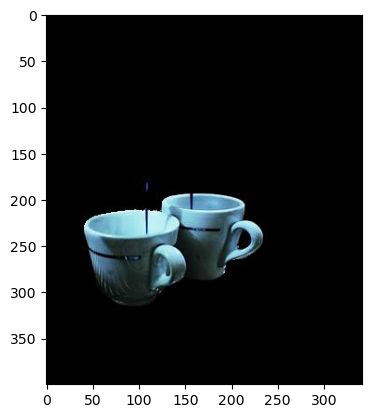

In [30]:
img1 = os.path.join(folder1,one[4])
img = cv2.imread(img1)
plt.imshow(img)


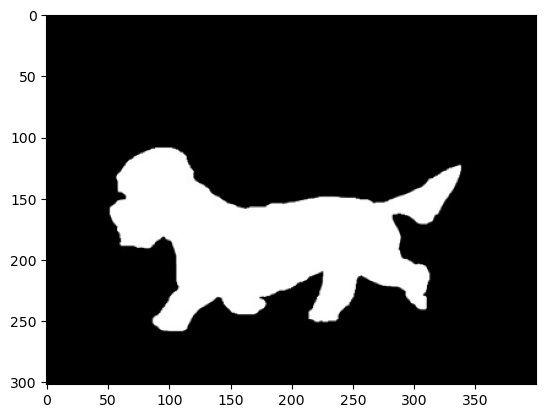

In [18]:
img2 = os.path.join(folder2,two[0])
img = cv2.imread(img2)
plt.imshow(img)


In [22]:
mean_iou, ious = calculate_folder_iou(folder1, folder2)
print(f"Mean IoU: {mean_iou}")
for idx, iou in enumerate(ious):
    print(f"IoU for image {idx+1}: {iou}")

5019it [02:34, 32.46it/s]

Mean IoU: 0.852670241418112
IoU for image 1: 0.9607469857673828
IoU for image 2: 0.8808311545341957
IoU for image 3: 0.9550067245384521
IoU for image 4: 0.9801206062412583
IoU for image 5: 0.8796095444685467
IoU for image 6: 0.7933352002240269
IoU for image 7: 0.8921877137775346
IoU for image 8: 0.9296950462260246
IoU for image 9: 0.8676297747306562
IoU for image 10: 0.9811615245009074
IoU for image 11: 0.8173925123289574
IoU for image 12: 0.8814164150425473
IoU for image 13: 0.9759335417009376
IoU for image 14: 0.9140057587347974
IoU for image 15: 0.9475637883811446
IoU for image 16: 0.6561668464581086
IoU for image 17: 0.9081729524467075
IoU for image 18: 0.8810850765023284
IoU for image 19: 0.881651766709238
IoU for image 20: 0.9393694421988682
IoU for image 21: 0.9850583090379009
IoU for image 22: 0.968421951011351
IoU for image 23: 0.838316378038363
IoU for image 24: 0.7650736832318349
IoU for image 25: 0.9238754325259516
IoU for image 26: 0.8957264432087008
IoU for image 27: 0.98

# Finding IOU between Original Mask and Mask Generated Using U^2 Net Model

In [8]:
import os
from PIL import Image
import numpy as np

folder3 = '/home/jovyan/video-storage/amit_files/MTP_01/U2_Net_Salient Map/U2Net_Sailency_Predicted_output'

three = sorted(os.listdir(folder3))
for i in range(0,5):
    print(three[i])

print(len(three))

PredictionILSVRC2012_test_00000003.png
PredictionILSVRC2012_test_00000023.png
PredictionILSVRC2012_test_00000025.png
PredictionILSVRC2012_test_00000026.png
PredictionILSVRC2012_test_00000034.png
5019


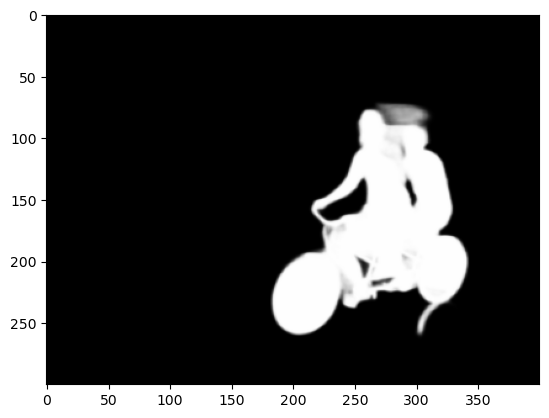

In [15]:
img1 = os.path.join(folder3,three[1])
img = cv2.imread(img1)
plt.imshow(img)


In [27]:
mean_iou, ious = calculate_folder_iou(folder2, folder3)
print(f"Mean IoU: {mean_iou}")
for idx, iou in enumerate(ious):
    print(f"IoU for image {idx+1}: {iou}")

5019it [02:44, 30.46it/s]

Mean IoU: 0.7680817789127529
IoU for image 1: 0.6045646951149753
IoU for image 2: 0.8545040650406504
IoU for image 3: 0.9609635577516986
IoU for image 4: 0.8714445127644553
IoU for image 5: 0.8768977085347132
IoU for image 6: 0.7561936936936937
IoU for image 7: 0.7753263981009565
IoU for image 8: 0.9192984813869104
IoU for image 9: 0.6308258569128135
IoU for image 10: 0.881682960668538
IoU for image 11: 0.7676946410515673
IoU for image 12: 0.74395579092793
IoU for image 13: 0.9595154918541252
IoU for image 14: 0.9088792957508042
IoU for image 15: 0.9525562802440564
IoU for image 16: 0.9374553252323088
IoU for image 17: 0.9189095629597577
IoU for image 18: 0.9616254468519735
IoU for image 19: 0.8948899044453676
IoU for image 20: 0.9004982752012265
IoU for image 21: 0.9891965123145865
IoU for image 22: 0.8237212495708891
IoU for image 23: 0.660423254682559
IoU for image 24: 0.6264456141699005
IoU for image 25: 0.900610973322848
IoU for image 26: 0.8458726686622151
IoU for image 27: 0.984

In [7]:
folder2 = "/home/jovyan/video-storage/amit_files/Master_Thesis_Project/DUTS-TE/DUTS-TE-Mask"

two = sorted(os.listdir(folder2))
for i in range(0,5):
    print(two[i])

print(len(two))

ILSVRC2012_test_00000003.png
ILSVRC2012_test_00000023.png
ILSVRC2012_test_00000025.png
ILSVRC2012_test_00000026.png
ILSVRC2012_test_00000034.png
5019


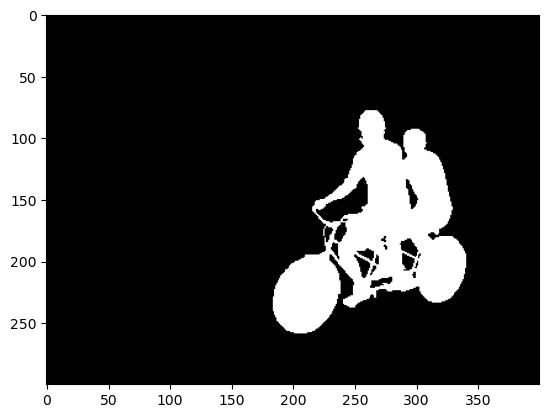

In [16]:
img1 = os.path.join(folder2,two[1])
img = cv2.imread(img1)
plt.imshow(img)


In [29]:
# From, here we can say that Tracer have better IOU value than the U2 Net,
# So, we will proceed with the Tracer generted mask

# Hi

In [4]:
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.FOMM.Source_Model.logger import Logger, Visualizer
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.FOMM.Source_Model.sync_batchnorm import DataParallelWithCallback
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.PREDICTOR.VAE import VAE_origin
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.FOMM.Source_Model.augmentation import SelectRandomFrames, SelectFirstFrames_two, VideoToTensor
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.FOMM.Source_Model.frames_dataset import FramesDataset
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.PREDICTOR.Source_Model.prediction_toplevel import KPDataset,get_data_from_dataloader_60
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.FOMM.Source_Model.modules.generator import OcclusionAwareGenerator,calculate_frechet_distance,compute_fvd
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.FOMM.Source_Model.modules.keypoint_detector import KPDetector
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.FOMM.Source_Model.logger import Logger, Visualizer, Visualizer_slow

from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.FOMM.Source_Model.modules.keypoint_detector import ModifiedKPDetector, KPDetector

2024-10-18 11:54:23.083535: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-18 11:54:23.127409: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 11:54:23.805302: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
checkpoint = "/home/jovyan/video-storage/amit_files/saved_model/vox-cpk.pth.tar"

In [6]:
import os   
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
import numpy as np
# import imageio
from tqdm import trange
from torch.utils.data import DataLoader, Dataset
import tensorflow.compat.v1 as tf
import pickle
import gc
import yaml
from torch import nn
import tensorflow.compat.v1 as tf
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt

!pip install imageio[ffmpeg]
import imageio

import os, sys
os.environ["CUDA_VISIBLE_DEVICES"]='0'

In [7]:
####### call the config functions and inference dataloader #########
config = "/home/jovyan/video-storage/amit_files/Motion_Transfer_Keypoints_Prediction/Keypoints_Prediction/config/abs-vox.yml"

with open(config) as f:
    config = yaml.safe_load(f)
    
kp_detector = KPDetector(**config['model_params']['kp_detector_params'],
                            **config['model_params']['common_params'])

if checkpoint is not None:
    Logger.load_cpk(checkpoint, generator = None, kp_detector = kp_detector)

/opt/conda/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
if torch.cuda.is_available():
    kp_detector = DataParallelWithCallback(kp_detector)

kp_detector.eval()

DataParallelWithCallback(
  (module): KPDetector(
    (predictor): Hourglass(
      (encoder): Encoder(
        (down_blocks): ModuleList(
          (0): DownBlock2d(
            (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
          )
          (1): DownBlock2d(
            (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm): SynchronizedBatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
          )
          (2): DownBlock2d(
            (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm): SynchronizedBatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [14]:
forg_path = "/home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/Foreground_Sailent"
forg_folder = sorted(os.listdir(forg_path))

forg_folder[:4]

['ILSVRC2012_test_00000003.jpg',
 'ILSVRC2012_test_00000023.jpg',
 'ILSVRC2012_test_00000025.jpg',
 'ILSVRC2012_test_00000026.jpg']

In [10]:
from PIL import Image
import torchvision.transforms as transforms
from tqdm import tqdm

In [11]:
img = os.path.join(forg_path,forg_folder[0])
img = Image.open(img)

# resize_transform = transforms.Resize((256 , 256))

# resized_image_pil = resize_transform(img)

to_tensor = transforms.ToTensor()
# resized_image_tensor = to_tensor(resized_image_pil)
resized_image_tensor = to_tensor(img)

resized_image_tensor = resized_image_tensor.unsqueeze(0)
# img = torch.rand(1,3,302,400)
# print(resized_image_tensor.shape)
output = kp_detector(resized_image_tensor)
# output = kp_detector(img)

In [12]:
output

{'value': tensor([[[ 0.0524,  0.2209],
          [-0.3470,  0.4017],
          [-0.3075, -0.1039],
          [-0.4945,  0.2214],
          [-0.5154, -0.0119],
          [ 0.2838,  0.4948],
          [ 0.6609, -0.0165],
          [-0.1543,  0.4763],
          [-0.5526, -0.0755],
          [ 0.1258, -0.2552]]], device='cuda:0', grad_fn=<SumBackward1>),
 'jacobian': tensor([[[[ 1.4298, -0.3587],
           [ 0.2904,  0.9476]],
 
          [[ 1.2073, -0.3265],
           [ 0.4148,  0.7334]],
 
          [[ 1.0988,  0.4561],
           [ 0.1779,  1.1643]],
 
          [[ 1.1984,  0.5815],
           [-0.0085,  1.9933]],
 
          [[ 1.3299, -0.0553],
           [ 0.2373,  1.1904]],
 
          [[ 1.6390,  0.0273],
           [-0.1942,  1.3078]],
 
          [[ 0.4166, -0.8893],
           [ 0.2558,  1.8144]],
 
          [[ 0.8326,  0.3314],
           [-0.5278,  0.8875]],
 
          [[ 1.2107,  0.0387],
           [ 0.2379,  1.2313]],
 
          [[ 1.2321,  0.8444],
           [-0.3801

In [26]:
forg_kp = list()

for i in tqdm(range(0,len(forg_folder))):
    img = os.path.join(forg_path,forg_folder[i])
    img = Image.open(img)
    # resize_transform = transforms.Resize((256 , 256))

    # resized_image_pil = resize_transform(img)

    to_tensor = transforms.ToTensor()
    # resized_image_tensor = to_tensor(resized_image_pil)
    resized_image_tensor = to_tensor(img)

    resized_image_tensor = resized_image_tensor.unsqueeze(0)
    output = kp_detector(resized_image_tensor)
    output['value'] = output['value'].detach().cpu().numpy()
    output['jacobian'] = output['jacobian'].detach().cpu().numpy()
    forg_kp.append(output)

100%|█████████████████████████████████████████████████████████████████████| 5019/5019 [05:36<00:00, 14.92it/s]


In [27]:
len(forg_kp)

5019

In [28]:
import pickle

# Save the list to a local file
with open('/home/jovyan/video-storage/amit_files/MTP_01/keypoints_list.pkl', 'wb') as f:
    pickle.dump(forg_kp, f)


In [29]:
with open('/home/jovyan/video-storage/amit_files/MTP_01/keypoints_list.pkl', "rb") as f:
    kp_time_series = pickle.load(f)
len(kp_time_series)

5019

In [30]:
kp_time_series[0]

{'value': array([[[ 0.05239999,  0.22085342],
         [-0.34699345,  0.40166438],
         [-0.30754453, -0.10393508],
         [-0.49451125,  0.22137281],
         [-0.5153749 , -0.01187763],
         [ 0.28382525,  0.49481   ],
         [ 0.6609081 , -0.01649451],
         [-0.15434021,  0.4763183 ],
         [-0.5525958 , -0.07548439],
         [ 0.12575307, -0.25520638]]], dtype=float32),
 'jacobian': array([[[[ 1.4297869 , -0.35873944],
          [ 0.29040906,  0.9475577 ]],
 
         [[ 1.2073462 , -0.32650065],
          [ 0.41479287,  0.73337805]],
 
         [[ 1.0988159 ,  0.4561469 ],
          [ 0.17789724,  1.1642663 ]],
 
         [[ 1.1983757 ,  0.58149374],
          [-0.00846464,  1.9933388 ]],
 
         [[ 1.3299172 , -0.05528117],
          [ 0.23730028,  1.190417  ]],
 
         [[ 1.6389772 ,  0.02732885],
          [-0.19423534,  1.3078095 ]],
 
         [[ 0.41659462, -0.88928485],
          [ 0.25579733,  1.8144051 ]],
 
         [[ 0.83262867,  0.3313794 ],


In [31]:
print("Amit")

Amit


In [32]:
backg_path = "/home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/Background_Sailent"
backg_folder = sorted(os.listdir(forg_path))

backg_folder[:4]

['ILSVRC2012_test_00000003.jpg',
 'ILSVRC2012_test_00000023.jpg',
 'ILSVRC2012_test_00000025.jpg',
 'ILSVRC2012_test_00000026.jpg']

In [36]:
backg_kp = list()

for i in tqdm(range(0,len(backg_folder))):
    img = os.path.join(backg_path,backg_folder[i])
    img = Image.open(img)

    resized_image_tensor = to_tensor(img)

    resized_image_tensor = resized_image_tensor.unsqueeze(0)
    output = kp_detector(resized_image_tensor)
    output['value'] = output['value'].detach().cpu().numpy()
    output['jacobian'] = output['jacobian'].detach().cpu().numpy()
    backg_kp.append(output)

100%|█████████████████████████████████████████████████████████████████████| 5019/5019 [05:47<00:00, 14.43it/s]


In [37]:
len(backg_kp)

5019

In [38]:
import pickle

# Save the list to a local file
with open('/home/jovyan/video-storage/amit_files/MTP_01/keypoints_list_backg.pkl', 'wb') as f:
    pickle.dump(backg_kp, f)

In [39]:
with open('/home/jovyan/video-storage/amit_files/MTP_01/keypoints_list_backg.pkl', "rb") as f:
    kp_time_series = pickle.load(f)
len(kp_time_series)

5019

# Debug KP Detector

In [131]:
from Motion_Transfer_Keypoints_Prediction.Keypoints_Prediction.Training_Prediction.FOMM.Source_Model.sync_batchnorm.batchnorm import SynchronizedBatchNorm2d as BatchNorm2d
from torch import nn
import torch.nn.functional as F
import torch
import torchvision.transforms.functional as TF

class DownBlock2d(nn.Module):
    """
    Downsampling block for use in encoder.
    """

    def __init__(self, in_features, out_features, kernel_size=3, padding=1, groups=1):
        super(DownBlock2d, self).__init__()
        self.conv = nn.Conv2d(in_channels=in_features, out_channels=out_features, kernel_size=kernel_size,
                              padding=padding, groups=groups)
        self.norm = BatchNorm2d(out_features, affine=True)
        self.pool = nn.AvgPool2d(kernel_size=(2, 2))

    def forward(self, x):
        out = self.conv(x)
        out = self.norm(out)
        out = F.relu(out)
        out = self.pool(out)
        return out


In [56]:
down = DownBlock2d(in_features = 3,out_features = 16)
down

DownBlock2d(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm): SynchronizedBatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
)

In [120]:
img = torch.rand(1,3,302,400)
out = down(img)
out.shape

torch.Size([1, 16, 151, 200])

In [89]:
class UpBlock2d(nn.Module):
    """
    Upsampling block for use in decoder.
    """

    def __init__(self, in_features, out_features, kernel_size=3, padding=1, groups=1):
        super(UpBlock2d, self).__init__()

        self.conv = nn.Conv2d(in_channels=in_features, out_channels=out_features, kernel_size=kernel_size,
                              padding=padding, groups=groups)
        self.norm = BatchNorm2d(out_features, affine=True)

    def forward(self, x):
        out = F.interpolate(x, scale_factor=2)
        out = self.conv(out)
        out = self.norm(out)
        out = F.relu(out)
        return out

In [90]:
up = UpBlock2d(in_features = 128,out_features = 64)
up

UpBlock2d(
  (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [91]:
img1 = torch.rand(1,128,50,64)
out = up(img1)
out.shape

torch.Size([1, 64, 100, 128])

In [92]:
class Encoder(nn.Module):
    """
    Hourglass Encoder
    """

    def __init__(self, block_expansion, in_features, num_blocks=3, max_features=256):
        super(Encoder, self).__init__()

        down_blocks = []
        for i in range(num_blocks):
            down_blocks.append(DownBlock2d(in_features if i == 0 else min(max_features, block_expansion * (2 ** i)),
                                           min(max_features, block_expansion * (2 ** (i + 1))),
                                           kernel_size=3, padding=1))
        self.down_blocks = nn.ModuleList(down_blocks)

    def forward(self, x):
        outs = [x]
        for down_block in self.down_blocks:
            outs.append(down_block(outs[-1]))
        return outs

In [93]:
encoder = Encoder(block_expansion = 32,in_features = 3)
encoder

Encoder(
  (down_blocks): ModuleList(
    (0): DownBlock2d(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    )
    (1): DownBlock2d(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm): SynchronizedBatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    )
    (2): DownBlock2d(
      (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm): SynchronizedBatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    )
  )
)

In [132]:
out = encoder(img)

In [133]:
print(out[0].shape)
print(out[1].shape)
print(out[2].shape)
print(out[3].shape)

torch.Size([1, 3, 302, 400])
torch.Size([1, 64, 151, 200])
torch.Size([1, 128, 75, 100])
torch.Size([1, 256, 37, 50])


In [134]:
class Decoder(nn.Module):
    """
    Hourglass Decoder
    """

    def __init__(self, block_expansion, in_features, num_blocks=3, max_features=256):
        super(Decoder, self).__init__()

        up_blocks = []

        for i in range(num_blocks)[::-1]:
            in_filters = (1 if i == num_blocks - 1 else 2) * min(max_features, block_expansion * (2 ** (i + 1)))
            out_filters = min(max_features, block_expansion * (2 ** i))
            up_blocks.append(UpBlock2d(in_filters, out_filters, kernel_size=3, padding=1))

        self.up_blocks = nn.ModuleList(up_blocks)
        self.out_filters = block_expansion + in_features

    def forward(self, x):
        out = x.pop()
        for up_block in self.up_blocks:
            out = up_block(out)
            skip = x.pop()
            
            if out.shape != skip.shape:
                out = TF.resize(out,size = skip.shape[2:],antialias = True)
                
            print(f"out: {out.shape} and skip = {skip.shape}")
            out = torch.cat([out, skip], dim=1)
        return out

In [135]:
decoder = Decoder(block_expansion = 32,in_features = 256)
decoder

Decoder(
  (up_blocks): ModuleList(
    (0): UpBlock2d(
      (conv): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm): SynchronizedBatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): UpBlock2d(
      (conv): Conv2d(256, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): UpBlock2d(
      (conv): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm): SynchronizedBatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
)

In [136]:
out1 = decoder(out)

out: torch.Size([1, 128, 75, 100]) and skip = torch.Size([1, 128, 75, 100])
out: torch.Size([1, 64, 151, 200]) and skip = torch.Size([1, 64, 151, 200])
out: torch.Size([1, 32, 302, 400]) and skip = torch.Size([1, 3, 302, 400])


In [85]:
out1.shape

torch.Size([1, 35, 400, 512])

In [ ]:
# RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 8 but got size 9 for tensor number 1 in the list.